Ref: https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 29

In [4]:
np.random.seed(SEED)

def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [5]:
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

Text(0.5,1,'Data')

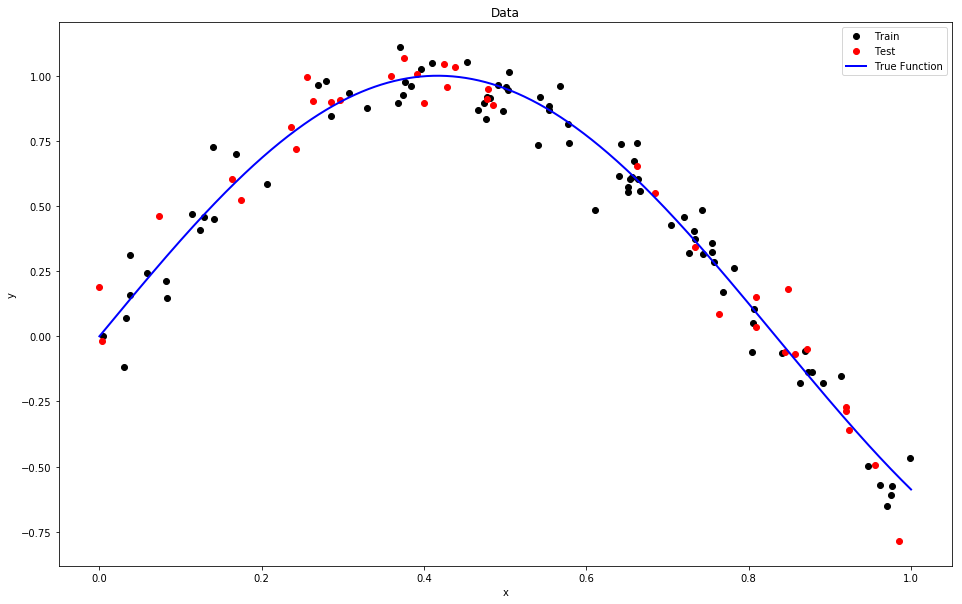

In [8]:
plt.figure(figsize=(16,10))
plt.plot(train, y_train, 'ko', label = 'Train')
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

In [9]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calculate the cross validation score
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Training predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

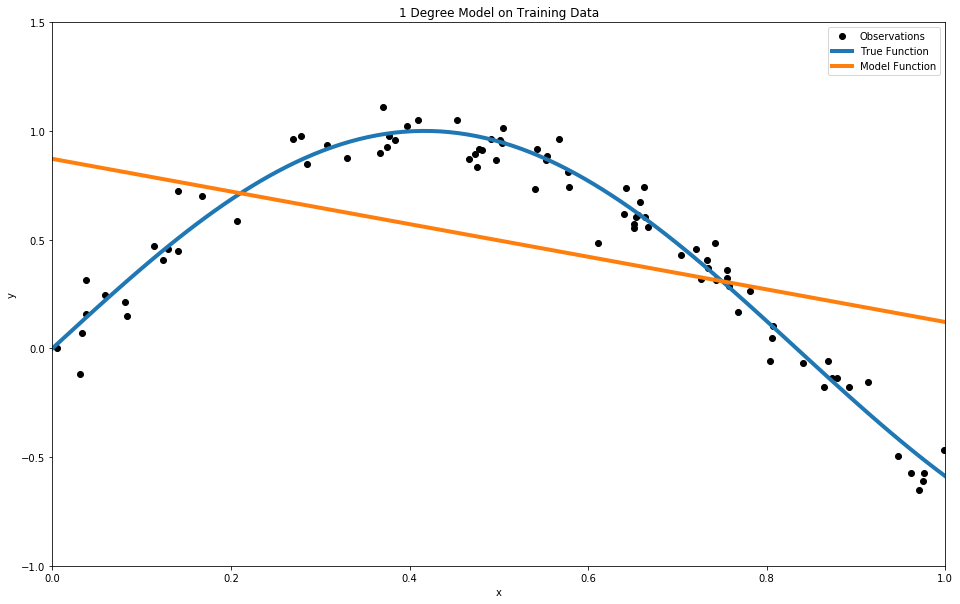

In [11]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

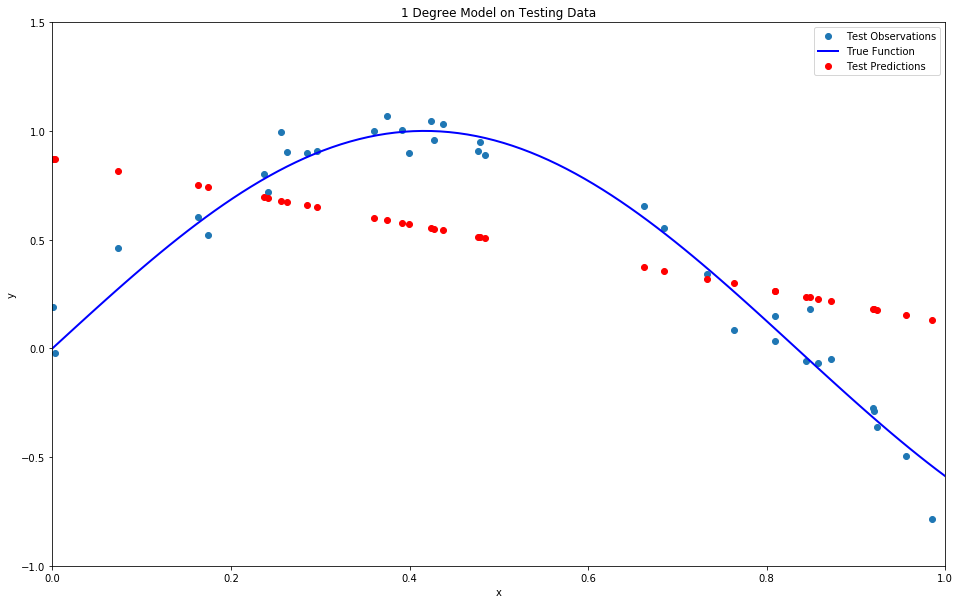

In [12]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

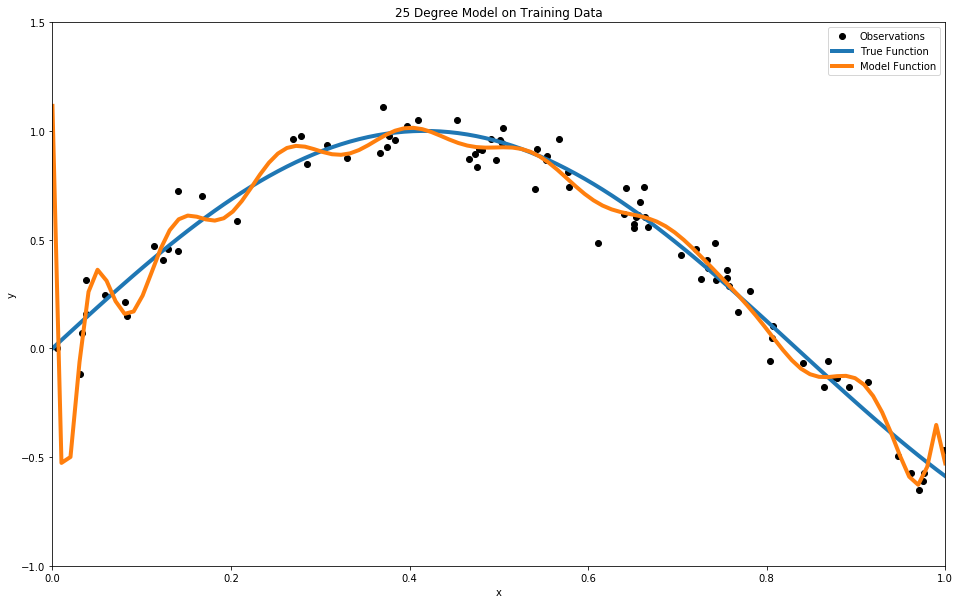

In [14]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, plot='train', degrees = 25)

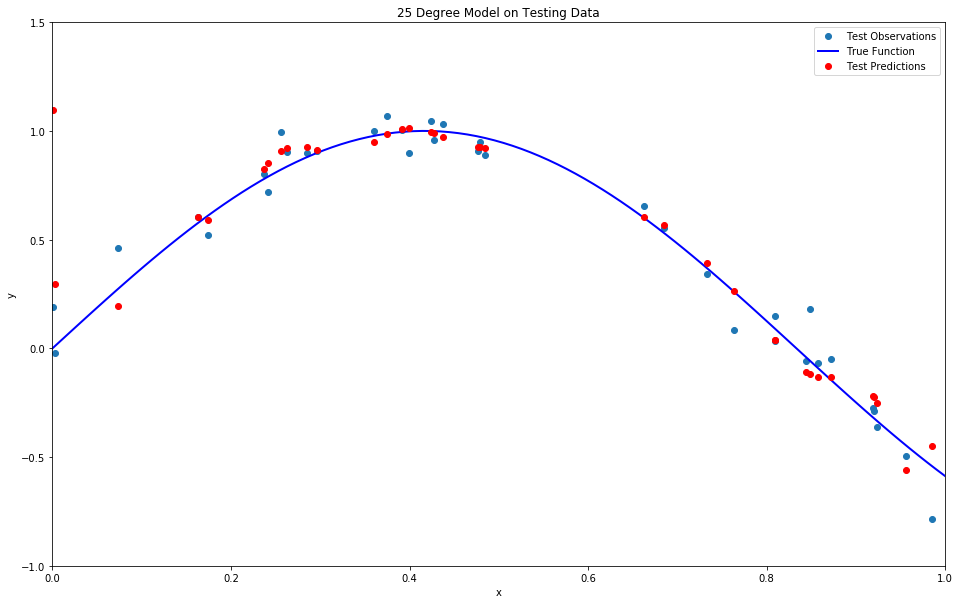

In [15]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

In [20]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Results dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Try each value of degrees for the model and record results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'error'] = degree_results[2]

In [22]:
print('10 Lowest Errors\n')
train_eval = results.sort_values('error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'error']] .head(10)

10 Lowest Errors



,degrees,error
0,3,0.008552
1,4,0.008714
2,5,0.009635
3,6,0.009777
4,7,0.010521
5,2,0.010676
6,8,0.011409
7,11,0.012923
8,9,0.013293
9,10,0.014531


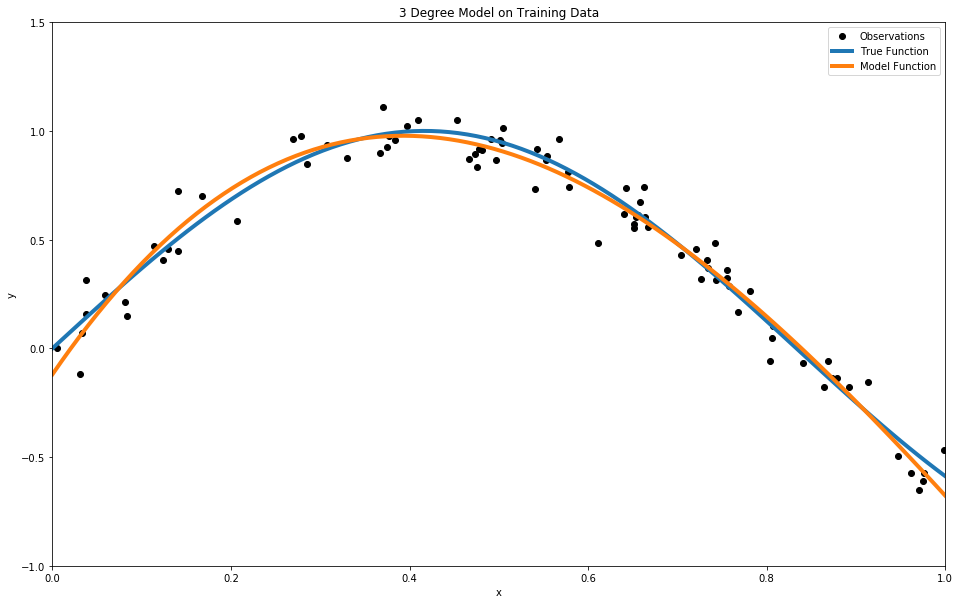

In [23]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, degrees = 3, plot='train')

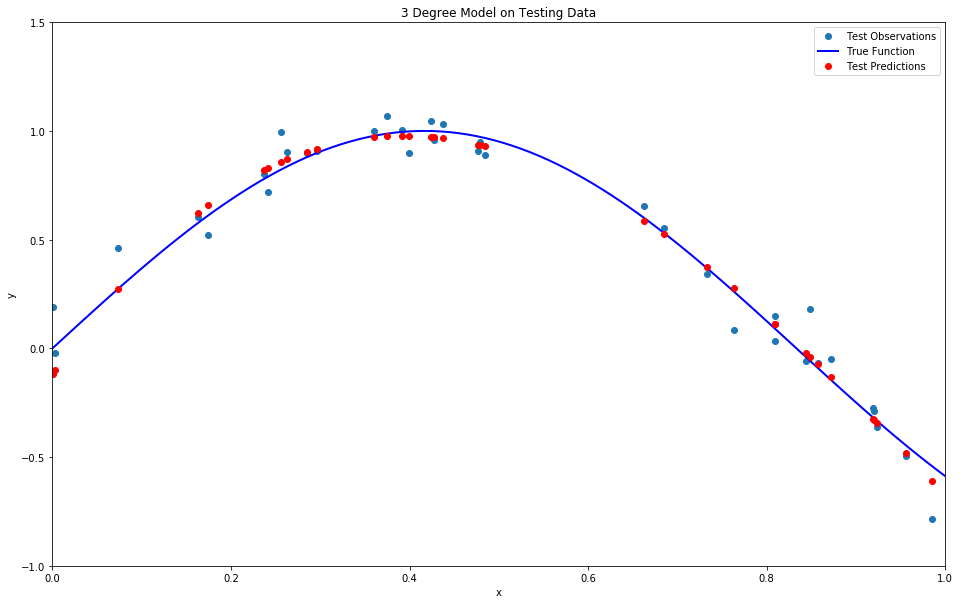

In [24]:
plt.figure(figsize=(16,10))
fit_poly(train, y_train, test, y_test, degrees = 3, plot='test')